In [1]:
from sklearn.cluster import KMeans
from semi_supervised_clustering import *

In [2]:
x_train, y_train, x_test, y_test = mnist_data(categorical=True)
Method = CopKMean
rounds = 5

In [3]:
accs = []
percentages = [0.01, 0.05, 0.1, 0.2, 0.5]
for percentage in tqdm(percentages, desc=">> percentages"):
    accs_round = []
    for _ in tqdm(range(rounds), desc="rounds"):
        labeled_data, labeled_labels, unlabeled_data, unlabeled_labels = prepare_labeled_data(x_train, y_train,
                                                                                              percentage=percentage)
        X = np.concatenate((labeled_data, unlabeled_data), axis=0)
        label_assignments = list(labeled_labels) + list(unlabeled_labels)

        # print(X.shape)
        # print(len(labeled_data), len(labeled_labels))
        # print(set(labeled_labels), set(y_train))

        # clustering
        copkmean = Method(n_components=10)
        copkmean.fit(X, labeled_labels)
        cluster_assignments = copkmean.predict(X)
        # centroids = copkmean.centroids

        # Method.scatter_cluster_points_with_labeled(X, label_assignments, cluster_assignments, n_labeled=len(labeled_labels))
        accs_round.append(clustering_accuracy(label_assignments, cluster_assignments))
    accs.append(accs_round)

>> percentages: 100%|██████████| 5/5 [36:57<00:00, 443.60s/it]


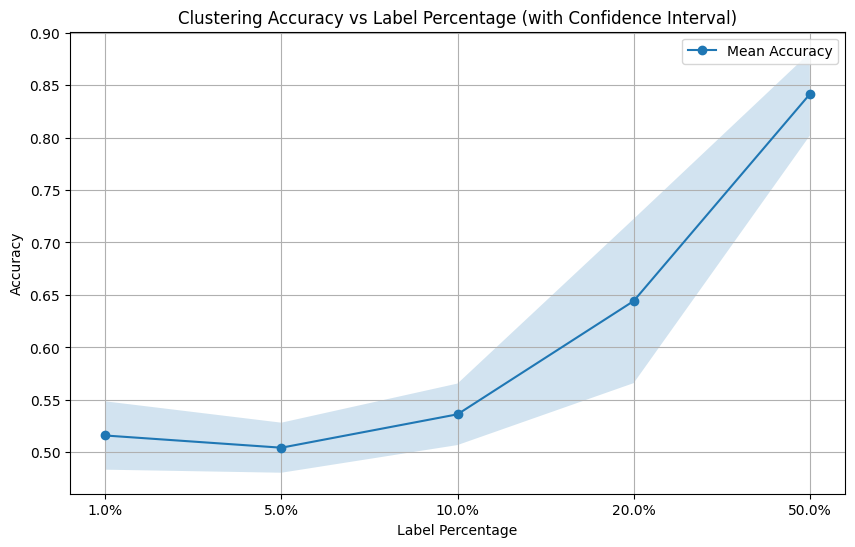

In [4]:
plot_clustering_accs(accs, percentages)